# IRIS Flower Classification

In [26]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the Dataset

In [52]:
import pandas as pd
df=pd.read_csv('IRIS Flower.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [55]:
df.duplicated().sum()

3

In [56]:
x=df.drop(columns=['species'])
y=df[['species']]

In [57]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [61]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [62]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.33, random_state=42)

In [64]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.356361,0.250967,0.133226
105,2.128516,-0.124958,1.615744,1.185010
66,-0.294842,-0.124958,0.421564,0.396172
0,-0.900681,1.032057,-1.341272,-1.312977
122,2.249683,-0.587764,1.672610,1.053537


In [65]:
ytrain.head()

,species
96,Iris-versicolor
105,Iris-virginica
66,Iris-versicolor
0,Iris-setosa
122,Iris-virginica


In [66]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.587764,0.535296,0.001753
18,-0.173674,1.726266,-1.170675,-1.181504
118,2.249683,-1.050569,1.786341,1.447956
78,0.189830,-0.356361,0.421564,0.396172
76,1.159173,-0.587764,0.592162,0.264699


In [67]:
ytest.head()

,species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor


In [68]:
xtrain.shape

(100, 4)

In [69]:
xtest.shape

(50, 4)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [71]:
dct = {'Logistic Regression': LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier(),
       'KNN':KNeighborsClassifier(),
       'Support Vector Class':SVC()}

In [72]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [73]:
train = []
test = []
train_cv = []
for name, model in dct.items():
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    train.append(f1_train)
    test.append(f1_test)
    train_cv.append(f1_cv)
    print(f'Model Name : {name}\n')
    print(f'F1 Train : {f1_train:.4f}')
    print(f'F1 Test : {f1_test:.4f}')
    print(f'F1 Train CV 5 fold : {f1_cv:.4f}')
    print('\n==============================================\n')

Model Name : Logistic Regression

F1 Train : 0.9613
F1 Test : 0.9785
F1 Train CV 5 fold : 0.9320


Model Name : Decision Tree

F1 Train : 1.0000
F1 Test : 0.9785
F1 Train CV 5 fold : 0.9224


Model Name : Random Forest

F1 Train : 1.0000
F1 Test : 0.9785
F1 Train CV 5 fold : 0.9128


Model Name : Gradient Boost

F1 Train : 1.0000
F1 Test : 0.9785
F1 Train CV 5 fold : 0.9227


Model Name : KNN

F1 Train : 0.9613
F1 Test : 0.9785
F1 Train CV 5 fold : 0.9204


Model Name : Support Vector Class

F1 Train : 0.9710
F1 Test : 0.9785
F1 Train CV 5 fold : 0.9320




In [74]:
res = {'name':list(dct.keys()),
       'F1 Train':train,
       'F1 Test':test,
       'F1 CV':train_cv}

In [75]:
res

{'name': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  'Gradient Boost',
  'KNN',
  'Support Vector Class'],
 'F1 Train': [0.9613445378151261,
  1.0,
  1.0,
  1.0,
  0.9613445378151261,
  0.9710144927536232],
 'F1 Test': [0.978494623655914,
  0.978494623655914,
  0.978494623655914,
  0.978494623655914,
  0.978494623655914,
  0.978494623655914],
 'F1 CV': [0.9319552669552669,
  0.9223826173826174,
  0.9128099678099678,
  0.9226817626817627,
  0.9203968253968254,
  0.9319552669552669]}

In [76]:
df_res = pd.DataFrame(res)
df_res

,name,F1 Train,F1 Test,F1 CV
0,Logistic Regression,0.961345,0.978495,0.931955
1,Decision Tree,1.000000,0.978495,0.922383
2,Random Forest,1.000000,0.978495,0.912810
3,Gradient Boost,1.000000,0.978495,0.922682
4,KNN,0.961345,0.978495,0.920397
5,Support Vector Class,0.971014,0.978495,0.931955


In [77]:
df_res.sort_values(by='F1 CV', ascending=False)

,name,F1 Train,F1 Test,F1 CV
0,Logistic Regression,0.961345,0.978495,0.931955
5,Support Vector Class,0.971014,0.978495,0.931955
3,Gradient Boost,1.000000,0.978495,0.922682
1,Decision Tree,1.000000,0.978495,0.922383
4,KNN,0.961345,0.978495,0.920397
2,Random Forest,1.000000,0.978495,0.912810


In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [79]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [80]:
model.intercept_

array([-0.29172614,  1.81675575, -1.52502961])

In [81]:
model.coef_

array([[-0.95871701,  1.0379491 , -1.72692862, -1.60969547],
       [ 0.46054978, -0.3477385 , -0.21070817, -0.69815013],
       [ 0.49816723, -0.6902106 ,  1.93763679,  2.30784561]])

In [82]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [83]:
ypred_train[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [84]:
ytrain.head()

,species
96,Iris-versicolor
105,Iris-virginica
66,Iris-versicolor
0,Iris-setosa
122,Iris-virginica


In [85]:
ypred_test[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [86]:
ytest.head()

,species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor


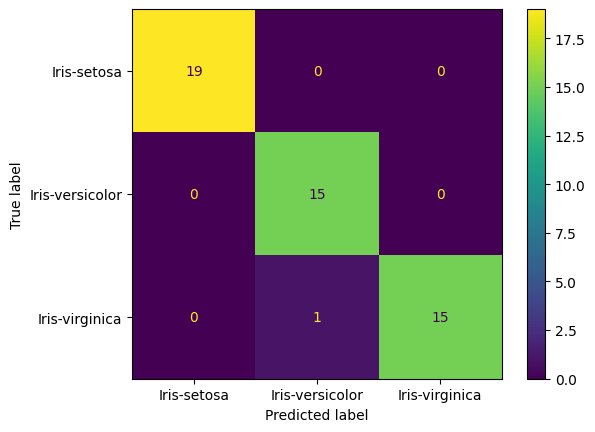

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [88]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [89]:
yprob_train = model.predict_proba(xtrain)
yprob_test = model.predict_proba(xtest)

In [90]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [96]:
import numpy as np 
max_prob = np.max(yprob_train[0:5], axis=1)
max_prob

array([0.86280898, 0.97842149, 0.73843396, 0.97876021, 0.9759749 ])

In [92]:

ypred_train[0:5]


array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [97]:
import numpy as np 
max_prob = np.max(yprob_test[0:5], axis=1)
max_prob

array([0.86632422, 0.967138  , 0.99499768, 0.74162553, 0.7349305 ])

In [95]:
ypred_test[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)